# Linear Regression

Goals:
* Understand how to prepare data for linear regression by selecting the relevant numerical features and target variable.
* Learn to split the data into training and testing sets using `train_test_split`
* Evalute the performance of the linear regression model

In [83]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn import linear_model, model_selection, preprocessing

In [84]:
path = "/home/dang/Learning/Python Statistics Essential Training/python-statistics-essential-training-4433355-main/data/ames-housing-dataset.zip"
housing = pd.read_csv(path)
housing = housing.fillna(value=0)

In [85]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,...,0,0,MnPrv,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,...,0,0,MnPrv,0,0,3,2010,WD,Normal,189900


In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [87]:
X = housing.select_dtypes('number').drop(columns="SalePrice")
y = housing.SalePrice

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=365, test_size=0.2)

In [88]:
x_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1486,1487,908102040,90,67.0,8777,5,7,1900,2003,0.0,...,0.0,0,70,0,0,0,0,0,9,2008
1071,1072,528181010,120,135.0,12304,7,5,2005,2005,144.0,...,484.0,0,33,0,0,0,0,0,6,2008
219,220,905103060,20,0.0,11341,5,6,1957,1996,180.0,...,528.0,0,0,0,0,95,0,0,5,2010
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,418.0,240,38,0,0,0,0,0,4,2006
2658,2659,902305090,70,60.0,9600,4,2,1900,1950,0.0,...,779.0,0,0,90,0,0,0,0,5,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,2310,526354020,20,90.0,11727,7,6,1969,1969,434.0,...,506.0,0,146,0,0,0,0,0,3,2006
428,429,528108070,60,96.0,11308,9,5,2008,2008,154.0,...,836.0,0,102,0,0,0,0,0,7,2009
859,860,907227080,20,60.0,7200,5,5,1972,1972,0.0,...,600.0,215,0,0,0,0,0,0,9,2009
801,802,906201130,50,79.0,12327,8,8,1983,2009,0.0,...,612.0,349,40,0,0,0,0,0,9,2009


In [89]:
y_train

1486    145900
1071    192000
219     121500
2928    170000
2658     87000
         ...  
2309    192100
428     335000
859     123000
801     316600
2740    137000
Name: SalePrice, Length: 2344, dtype: int64

In [90]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8736084385519067

In [91]:
lr.predict(x_test[:5])

array([114809.52845996, 135944.20038626, 117270.61777927, 185579.10427069,
        69530.75218173])

In [92]:
y_test[:5]

703     103000
674     113500
2643    110000
2194    200000
1949     64500
Name: SalePrice, dtype: int64

# Interpreting Linear Regression Models

In [93]:
lr.coef_

array([-1.12020308e+01, -2.01387182e-06, -1.57123920e+02,  3.32819602e+01,
        4.50651465e-01,  1.72559669e+04,  4.33719504e+03,  3.44013295e+02,
        2.05787756e+02,  3.58092269e+01,  1.11737600e+01,  2.19956159e+00,
       -3.81475552e+00,  9.55856602e+00,  1.90195683e+01,  1.90685867e+01,
       -3.69867047e+00,  3.43894844e+01,  7.24469127e+03, -2.45632201e+03,
        1.29960961e+03, -1.91659743e+03, -8.27785948e+03, -1.29314803e+04,
        2.45890926e+03,  3.89928998e+03, -1.39253244e+01,  1.01069049e+04,
        1.75769960e+01,  1.93294174e+01, -2.02734373e+01,  2.53850409e+01,
        4.14456120e+00,  5.14470083e+01, -3.52488732e+01, -8.92660472e+00,
        8.03314827e+01, -8.09716751e+03])

In [94]:
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

In [95]:
pd.Series(lr.coef_, index=lr.feature_names_in_)

Order                -11.202031
PID                   -0.000002
MS SubClass         -157.123920
Lot Frontage          33.281960
Lot Area               0.450651
Overall Qual       17255.966925
Overall Cond        4337.195037
Year Built           344.013295
Year Remod/Add       205.787756
Mas Vnr Area          35.809227
BsmtFin SF 1          11.173760
BsmtFin SF 2           2.199562
Bsmt Unf SF           -3.814756
Total Bsmt SF          9.558566
1st Flr SF            19.019568
2nd Flr SF            19.068587
Low Qual Fin SF       -3.698670
Gr Liv Area           34.389484
Bsmt Full Bath      7244.691266
Bsmt Half Bath     -2456.322010
Full Bath           1299.609611
Half Bath          -1916.597429
Bedroom AbvGr      -8277.859483
Kitchen AbvGr     -12931.480345
TotRms AbvGrd       2458.909257
Fireplaces          3899.289980
Garage Yr Blt        -13.925324
Garage Cars        10106.904905
Garage Area           17.576996
Wood Deck SF          19.329417
Open Porch SF        -20.273437
Enclosed

<Axes: >

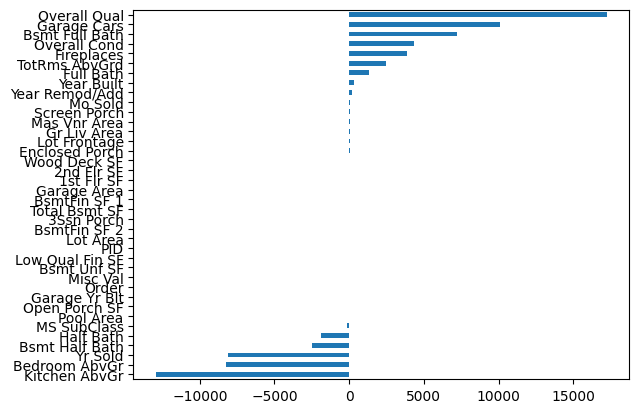

In [96]:
(
    pd.Series(lr.coef_, index=lr.feature_names_in_)
    .sort_values()
    .plot.barh()
)

<Axes: >

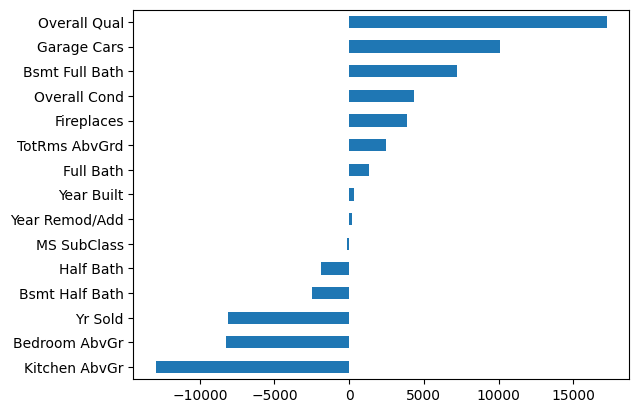

In [97]:
(
    pd.Series(lr.coef_, index=lr.feature_names_in_)
    .pipe(lambda ser: ser[ser.abs() > 100])
    .sort_values()
    .plot.barh()
)

In [98]:
(
    pd.Series(lr.coef_, index=lr.feature_names_in_)
    .pipe(lambda ser: ser[ser.abs() > 100])
    .sort_values()
    .index
)

Index(['Kitchen AbvGr', 'Bedroom AbvGr', 'Yr Sold', 'Bsmt Half Bath',
       'Half Bath', 'MS SubClass', 'Year Remod/Add', 'Year Built', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Overall Cond', 'Bsmt Full Bath',
       'Garage Cars', 'Overall Qual'],
      dtype='object')

# Standardizing Values

Goals:
* Understand the concept of standardization
* Learn to use the `StandardScaler` class
* Evaluate the impact of standardization on the performance of the linear regression model using the coeddicient of determination (R-squared) score.
* Visualize the coefficients of the linear regression model using a horizontal bar plot.

In [99]:
housing2 = pd.read_csv(path).fillna(value=0)

x2 = housing2.select_dtypes('number').drop(columns='SalePrice')
y2 = housing2.SalePrice

x2_train, x2_test, y2_train, y2_test = model_selection.train_test_split(x2, y2, random_state=365, test_size=0.2)

std = preprocessing.StandardScaler()
x2_train = std.fit_transform(x2_train)
x2_test = std.transform(x2_test)

In [100]:
lr2 = linear_model.LinearRegression()
lr2.fit(x2_train, y2_train)
lr2.score(x2_test, y2_test)

0.8736794748885821

<Axes: >

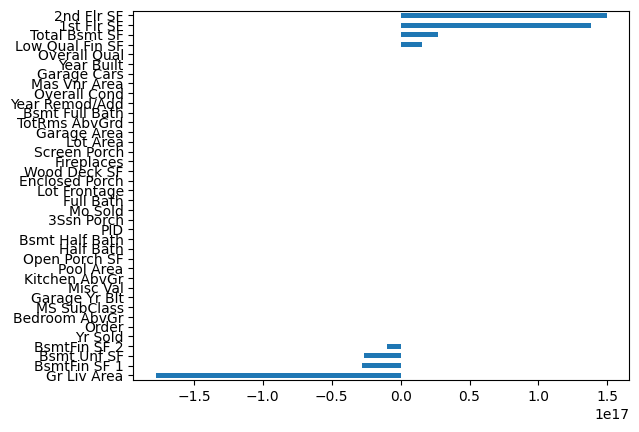

In [101]:
(
    pd.Series(lr2.coef_, index=x2.columns)
    .sort_values()
    .plot.barh()
)

<Axes: >

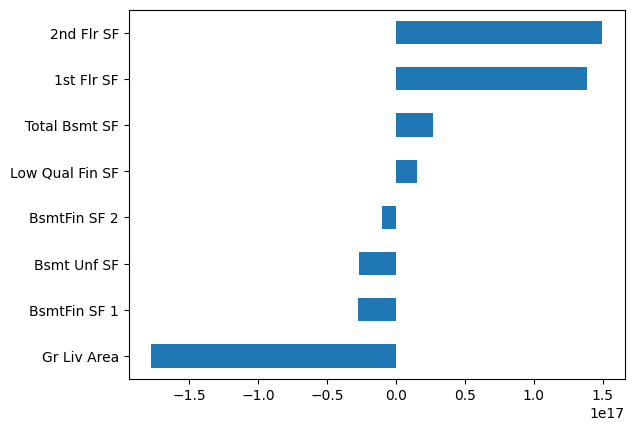

In [102]:
(
    pd.Series(lr2.coef_, index=x2.columns)
    .pipe(lambda ser: ser[ser.abs() > 1e8])
    .sort_values()
    .plot.barh()
)

# Regression with XGBoost

Goals:
* Learn to use XGBoost library (xgboost) for regression tasks
* Evaluate the performance of the XGBoost model
* Explore the importtance of features in the XGBoost model using the feature importances

In [103]:
x3 = housing.select_dtypes('number').drop(columns='SalePrice')
y3 = housing.SalePrice

x3_train, x3_test, y3_train, y3_test = model_selection.train_test_split(x3, y3, random_state=365, test_size=0.2)

std = preprocessing.StandardScaler().set_output(transform='pandas')
x3_train = std.fit_transform(x3_train)
x3_test = std.transform(x3_test)

In [104]:
import xgboost as xgb

In [105]:
xg = xgb.XGBRegressor()

xg.fit(x3_train, y3_train)
xg.score(x3_test, y3_test)

0.9184293526511126

<Axes: >

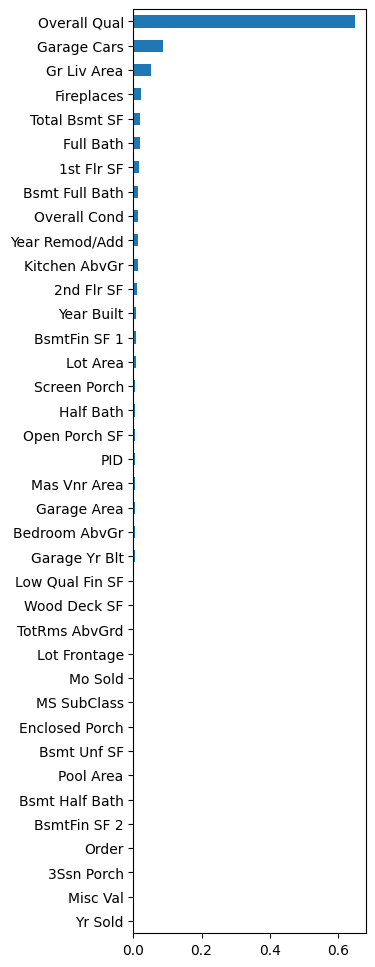

In [106]:
pd.Series(
    xg.feature_importances_, index=x3_train.columns
).sort_values().plot.barh(figsize=(3,12))

In [111]:
xg2 = xgb.XGBRegressor(enable_categorical=True)

xg2.fit(x3_train.astype(np.int64), y3_train)
xg2.score(x3_test.astype(np.int64), y3_test)

0.8913270058469294

<Axes: >

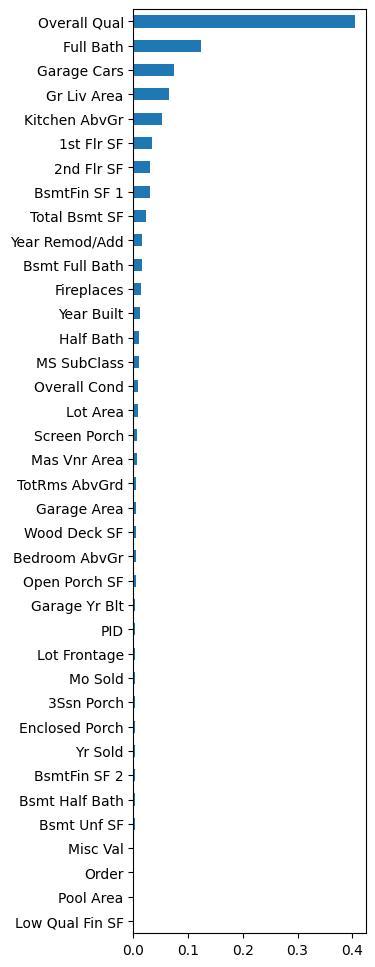

In [112]:
pd.Series(
    xg2.feature_importances_, index=x3_train.columns
).sort_values().plot.barh(figsize=(3,12))

In [113]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   